In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

DRIVE_PATH="/content/drive/My Drive/Colab Notebooks"

DATASET_PATH="datasets/tutorial data"
DATASET_FILE="players_22.csv"

Mounted at /content/drive


In [63]:
path = os.path.join(DRIVE_PATH, DATASET_PATH)
path = os.path.join(path, DATASET_FILE)
players = pd.read_csv(path)

features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)

<ipython-input-63-4145a58c0d37>:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(path)


In [64]:
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1. Scale the data (let each column have a similar scale so they have the same impact)
2. Initialize random centriods
3. Label each data point
4. Update centriods
5. Repeat 3 and 4 until centriods stop changing

In [65]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1 # Rescales numbers from 1 to 11
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [66]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [67]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample())) # iterates through each column and selects a single random value from each column and converted to a float
    centroids.append(centroid)
  return pd.concat(centroids, axis=1) # combines each series into a dataframe

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [68]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,6.217391,4.695652,5.347826,3.826087,3.826087
potential,4.695652,6.217391,7.521739,6.000000,5.565217
wage_eur,1.557940,1.014306,1.000000,2.044349,1.100143
value_eur,1.386152,1.051085,1.097479,1.009330,1.024022
age,1.740741,3.592593,3.962963,6.555556,6.185185


In [69]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1))) # calculate distance
  return distances.idxmin(axis=1)

In [70]:
labels = get_labels(data, centroids)
labels

0        2
1        2
2        3
3        2
4        2
        ..
19234    4
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [71]:
labels.value_counts()

1    8481
4    5061
2    4655
3     904
0      64
dtype: int64

In [72]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T #.apply calculates the geometric mean


In [73]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [74]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

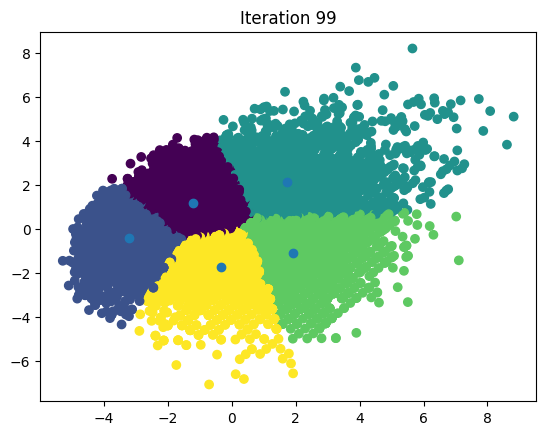

In [75]:
max_iterations = 100
k = 3

centriods = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while (iteration < max_iterations and not centriods.equals(old_centroids)):
  old_centriods = centriods

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1

In [76]:
centroids

,0,1,2,3,4
overall,4.687831,2.677860,7.121276,5.939944,4.405684
potential,6.417114,4.807875,7.533207,5.555499,4.324818
wage_eur,1.081109,1.017760,1.783689,1.225130,1.051246
value_eur,1.069342,1.015002,1.530988,1.079724,1.029686
age,2.865209,2.442530,4.262323,6.434620,5.088247


In [77]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
2866,Osvaldão Murilo,73,73,9000.0,3100000.0,21
2871,Nicolás Formido,73,73,16000.0,3600000.0,21
2877,Neviano Neves,73,73,17000.0,3600000.0,21
2884,Luis Couprins,73,73,9000.0,3200000.0,21
2885,Nuno Lisareda,73,73,19000.0,3600000.0,21
...,...,...,...,...,...,...
17785,H. Diarra,56,77,500.0,425000.0,17
17790,S. Swinkels,56,76,500.0,375000.0,17
17796,L. Díaz,56,76,500.0,375000.0,17
18071,Y. Djiga,55,77,600.0,375000.0,18
